# KNN IRIS 다중분류(multi classification)

---

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier

In [133]:
def get_iris(mode = None):
    df = pd.read_csv('iris.csv')
    df = df.drop(["Id"], axis=1).copy()
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
    
    
    if(mode == 'bin'):
        df = df.loc[df['species'] != 'Iris-virginica']
        
    df['species'] = df['species'].map({
    'Iris-setosa':0,
    'Iris-versicolor':1, 
    'Iris-virginica':2
    })
    
    X = df.iloc[:, :4]
    y = df.iloc[:,-1]
    
    X, y = shuffle(X,y, random_state=2021)
    num = int(len(y)*0.8)
    X_train = X.iloc[:num,:]
    X_test = X.iloc[num:,:]
    y_train = y.iloc[:num]
    y_test = y.iloc[num:]
    
    for col in X.columns:
        mu = X_train[col].mean()
        std = X_train[col].std()
        X_train[col] = (X_train[col]-mu)/std
        X_test[col] = (X_test[col]-mu)/std
    
    return X_train, X_test, y_train, y_test


In [134]:
X_train, X_test, y_train, y_test = get_iris()


print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


C:\Users\023\AppData\Local\Temp\ipykernel_12148\1618185059.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = (X_train[col]-mu)/std
C:\Users\023\AppData\Local\Temp\ipykernel_12148\1618185059.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = (X_test[col]-mu)/std


In [135]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [136]:
scores = []
for i in range(3, 30):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    score = clf.score(X_train, y_train)
    scores.append(score)
scores

[0.9666666666666667,
 0.9666666666666667,
 0.975,
 0.9666666666666667,
 0.9666666666666667,
 0.975,
 0.9666666666666667,
 0.975,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.95,
 0.9583333333333334,
 0.9666666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.925,
 0.9333333333333333]

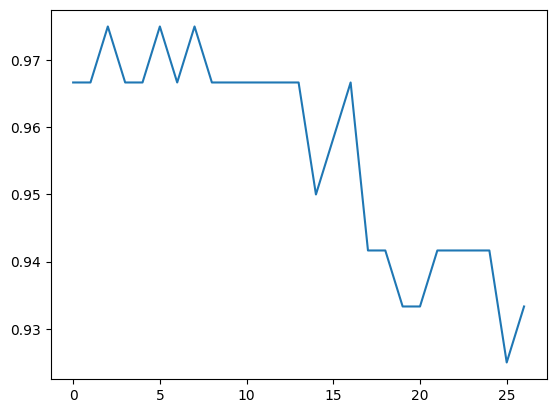

In [137]:
plt.plot(scores)

In [138]:
###평가
# 테스트
clf.score(X_test, y_test)

0.9333333333333333

In [139]:
clf.score(X_train, y_train)

0.9333333333333333

In [140]:
# 예측
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 1, 0,
       1, 0, 1, 2, 2, 1, 1, 2], dtype=int64)

In [141]:
y_test

array([0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 1, 0,
       1, 0, 1, 2, 2, 1, 1, 2], dtype=int64)

In [142]:
#y_pred, y_test 정확도 계산

In [143]:
(y_pred == y_test).sum()/len(y_test)

0.9333333333333333

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred, average='binary'):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred, average = average)
    rec = recall_score(y_true, y_pred, average = average)
    
    print('accuracy:', acc)
    print('precision:', pre)
    print('recall:', rec)
print_score(y_test, y_pred, average='macro')

accuracy: 0.9333333333333333
precision: 0.9351851851851851
recall: 0.9351851851851851
